<h1 style="text-align: center; color: rgb(76, 66, 211);">Comparaison des Modèles ARIMA, SARIMA et LSTM pour la Prédiction des Prix de Clôture des Actions</h1>
<p style="text-align: center;" color: rgb(76, 66, 211);>Par: <a href="www.linkedin.com/in/atmane-hachimi-25158b294">Mr HACHIMI ATMANE</a></p>
    <p style="text-align: center; color: rgb(124, 117, 229);">
    </p>
</p>
<p style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg" alt="Python Logo" width="70" height="70">
    <img src="https://upload.wikimedia.org/wikipedia/commons/0/01/Created_with_Matplotlib-logo.svg" alt="Matplotlib Logo" width="70" height="70">
    <img src="https://upload.wikimedia.org/wikipedia/commons/e/ed/Pandas_logo.svg" alt="Pandas Logo" width="70" height="70">
    <img src="https://upload.wikimedia.org/wikipedia/commons/3/31/NumPy_logo_2020.svg" alt="NumPy Logo" width="70" height="70">
    <img src="https://upload.wikimedia.org/wikipedia/commons/a/ae/Keras_logo.svg" alt="Keras Logo" width="70" height="70">
    <img src="https://upload.wikimedia.org/wikipedia/commons/0/05/Scikit_learn_logo_small.svg" alt="Scikit-learn Logo" width="70" height="70">
</p>

In [359]:
# Importer les bibliothèques nécessaires
import yfinance as yf
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [360]:
#download data from yfinance
end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

data = yf.download('AAPL', start=start, end=end)



[*********************100%%**********************]  1 of 1 completed


In [361]:
#display the data
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-14,175.250000,177.740005,172.210007,174.330002,171.520370,139380400
2021-12-15,175.110001,179.500000,172.309998,179.300003,176.410278,131063300
2021-12-16,179.279999,181.139999,170.750000,172.259995,169.483704,150185800
2021-12-17,169.929993,173.470001,169.690002,171.139999,168.381775,195432700
2021-12-20,168.279999,170.580002,167.460007,169.750000,167.014175,107499100


In [362]:
#display data infos
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2021-12-14 to 2024-12-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       755 non-null    float64
 1   High       755 non-null    float64
 2   Low        755 non-null    float64
 3   Close      755 non-null    float64
 4   Adj Close  755 non-null    float64
 5   Volume     755 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.3 KB


In [363]:
#verify the index of the data
data.index

DatetimeIndex(['2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17',
               '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
               '2021-12-27', '2021-12-28',
               ...
               '2024-12-02', '2024-12-03', '2024-12-04', '2024-12-05',
               '2024-12-06', '2024-12-09', '2024-12-10', '2024-12-11',
               '2024-12-12', '2024-12-13'],
              dtype='datetime64[ns]', name='Date', length=755, freq=None)

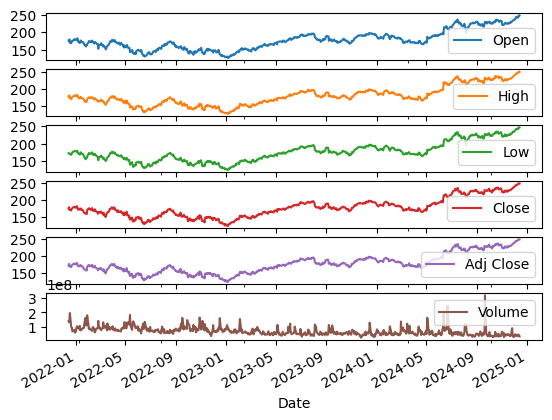

In [364]:
#plot evry column vs time

data.plot(subplots=True)
plt.show()




In [365]:
# Check for missing values in the dataset
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [366]:
# Count the number of duplicate rows in the DataFrame and return the count
data.duplicated().sum()


0

In [367]:
#create a new dataframe with the one column closing price
df = data['Close'].to_frame()
df.head()


,Close
Date,
2021-12-14,174.330002
2021-12-15,179.300003
2021-12-16,172.259995
2021-12-17,171.139999
2021-12-20,169.750000


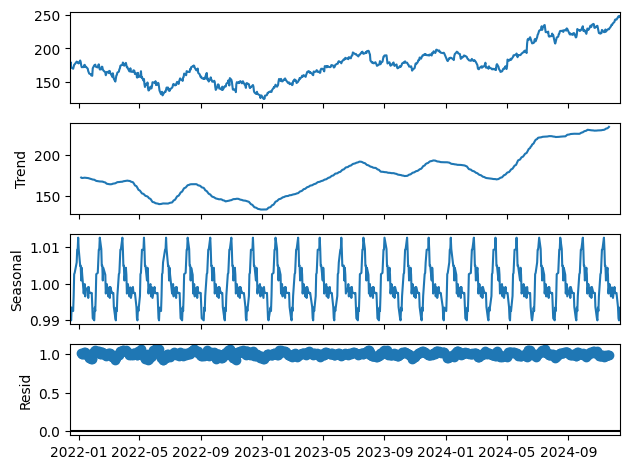

In [ ]:
#use the seaosnal_decompose function from statsmodels to decompose 
# the closing price into trend, seasonal and residual components
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='multiplicative', period=30)
result.plot()
plt.show()

### Description du graphique de décomposition saisonnière

Le graphique de décomposition saisonnière de la série temporelle des prix de clôture se compose de quatre sous-graphiques :

1. **Observed (Observé)** :
   - Le sous-graphe "Observed" montre les valeurs originales des prix de clôture sur la période spécifiée. On peut observer les fluctuations quotidiennes des prix de clôture.

2. **Trend (Tendance)** :
   - Le sous-graphe "Trend" montre la tendance à long terme des prix de clôture. On peut voir une tendance générale à la hausse  des prix de clôture sur la période. Cette composante lisse les fluctuations à court terme pour révéler la direction générale de la série.

3. **Seasonal (Saisonnalité)** :
   - Le sous-graphe "Seasonal" montre les variations saisonnières répétitives des prix de clôture. On peut observer des motifs périodiques qui se répètent à intervalles réguliers. Cette composante capture les motifs saisonniers dans les prix de clôture.

4. **Residual (Résidu)** :
   - Le sous-graphe "Residual" montre les résidus ou les erreurs après avoir retiré la tendance et la saisonnalité. On peut voir les variations aléatoires ou les bruits qui ne sont pas expliqués par la tendance ou la saisonnalité. Cette composante représente les variations imprévisibles dans les prix de clôture.

**En résumé**, la décomposition saisonnière permet de séparer la série temporelle en ses composantes de tendance, de saisonnalité et de résidu, ce qui facilite l'analyse et la compréhension des motifs sous-jacents dans les prix de clôture.

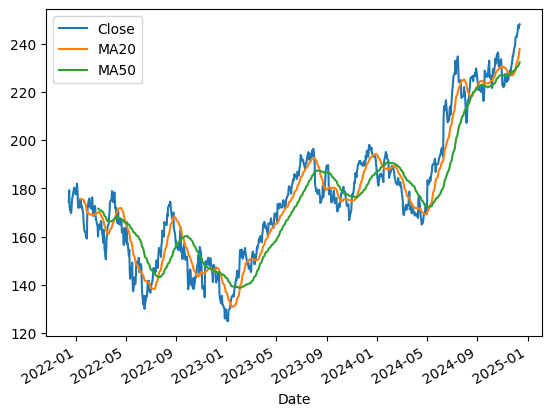

In [369]:
#the moving average of the closing price over a 20-day and 50-day period for visualize the trend of the stock price
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df[['Close', 'MA20', 'MA50']].plot()
plt.show()


Calculer les **moyennes mobiles** sur 20 et 50 jours permet de lisser les fluctuations quotidiennes des prix de clôture des actions, facilitant ainsi l'identification des tendances à court et à long terme. Cela aide les investisseurs à prendre des décisions éclairées en visualisant les mouvements de prix plus stables et en détectant les signaux de trading potentiels.

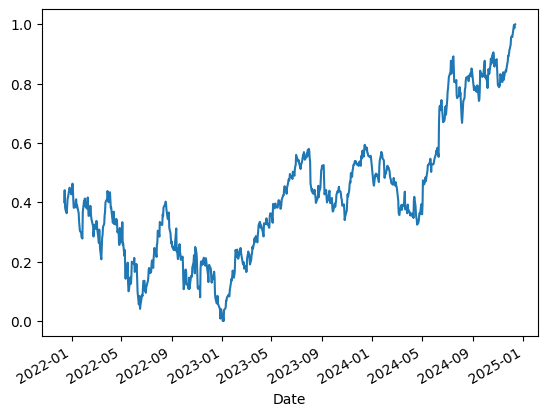

In [370]:
#Scale the closing price using MinMaxScaler for better visualization and analysis
scaler = MinMaxScaler()
df['Close_scaled'] = scaler.fit_transform(df[['Close']])
df['Close_scaled'].plot()
plt.show()

 **Scaling** des données est une étape cruciale pour assurer que les caractéristiques sont sur une échelle commune, améliorer les performances des algorithmes de machine learning, éviter les problèmes de stabilité numérique et faciliter la visualisation des données.

In [371]:
#display the scaled closing price
df['Close_scaled'].head()

Date
2021-12-14    0.400536
2021-12-15    0.440907
2021-12-16    0.383722
2021-12-17    0.374624
2021-12-20    0.363334
Name: Close_scaled, dtype: float64

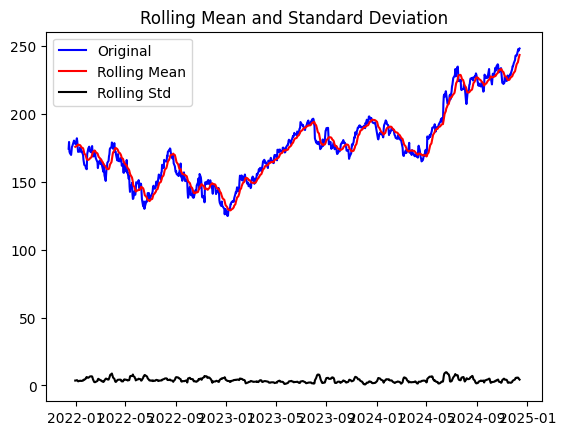

Results of dickey fuller test
Test Statistics                 -0.271963
p-value                          0.929382
No. of lags used                 0.000000
Number of observations used    754.000000
critical value (1%)             -3.439053
critical value (5%)             -2.865381
critical value (10%)            -2.568815
dtype: float64


In [372]:
# Define a function to test the stationarity of a time series using the Augmented Dickey-Fuller test
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(df['Close'])

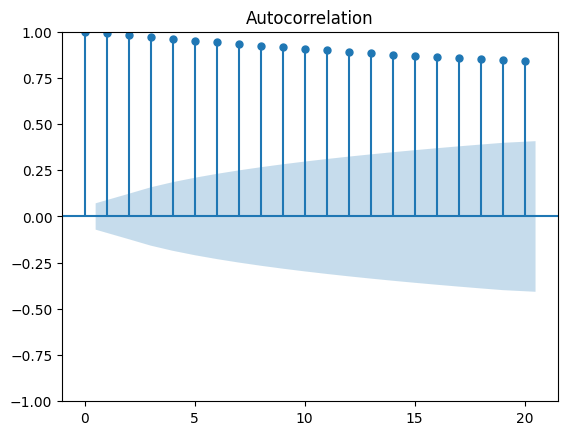

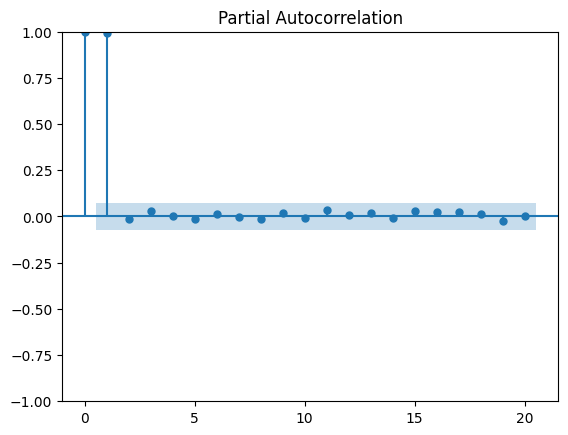

In [373]:
#plot the autocorrelation and partial autocorrelation functions
plot_acf(df['Close'], lags=20)
plt.show()

plot_pacf(df['Close'], lags=20)
plt.show()



### Analyse des graphes ACF et PACF

1-**ACF (Autocorrelation Function)**

Observation : Les coefficients sont significatifs (en dehors de la zone bleue) pour de nombreux retards (lags) au début, et ils décroissent lentement au fur et à mesure.
Interprétation : Cela indique la présence d'une dépendance à long terme dans les données. La décroissance lente suggère une possible non-stationnarité dans les données ou une série avec une tendance.
Conclusion : Une différenciation peut être nécessaire pour rendre la série stationnaire, un prérequis pour les modèles ARIMA.

2- **PACF (Partial Autocorrelation Function)**

Observation : Seuls les premiers retards (1 ou 2) sont significatifs ; les suivants sont proches de zéro.
Interprétation : Cela indique que la dépendance est principalement capturée par le premier ou les deux premiers termes d'autoregression.
Conclusion : Cela suggère qu'un modèle AR(1) ou AR(2) pourrait être suffisant pour expliquer les dépendances dans les données.
Conclusions générales
Les données montrent une non-stationnarité potentielle. Une différenciation est probablement nécessaire.
La structure PACF suggère qu'un modèle AR(1) ou AR(2) peut être un bon point de départ.
Si la différenciation est effectuée (modèle ARIMA), le paramètre 
d sera potentiellement égal à 1.
Étapes suivantes
Différencier les données et réanalyser les graphes ACF et PACF.
Tester un modèle ARIMA(p, d, q) en commençant par 
p=1 , d=1, q=0

**En conclusion**, les résultats indiquent que la série temporelle testée est non-stationnaire. Pour rendre la série stationnaire, vous pouvez envisager de différencier les données ou d'appliquer une transformation appropriée.

In [375]:
#transform the closing price to make it stationary

# Log transformation
df['close_log'] = np.log(df['Close'])

# Differencing
df['close_log_diff'] = df['close_log'].diff()

# Remove infinite values and NaNs
df['close_log_diff'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['close_log_diff'].dropna(inplace=True)

### Transformation logarithmique (log) :

La transformation logarithmique est utilisée pour stabiliser la variance de la série temporelle. Cela est particulièrement utile si la série présente une tendance exponentielle ou si les variations augmentent avec le temps.

### Différenciation (diff()) :

La différenciation est utilisée pour éliminer les tendances et rendre la série temporelle stationnaire en termes de moyenne. En prenant la différence entre les valeurs consécutives, les tendances linéaires sont éliminées.

- **diff()** : Cette méthode calcule la différence entre chaque élément et l'élément précédent dans la série temporelle. Elle est souvent utilisée pour transformer une série non stationnaire en une série stationnaire en éliminant les tendances.

En résumé, appliquer la transformation logarithmique suivie de la différenciation peut aider à rendre une série temporelle stationnaire en stabilisant la variance et en éliminant les tendances.

In [415]:
df.head()

,Close,MA20,MA50,Close_scaled,close_log,close_log_diff
Date,,,,,,
2021-12-14,174.330002,NaN,NaN,0.400536,5.160950,NaN
2021-12-15,179.300003,NaN,NaN,0.440907,5.189060,0.028110
2021-12-16,172.259995,NaN,NaN,0.383722,5.149005,-0.040055
2021-12-17,171.139999,NaN,NaN,0.374624,5.142482,-0.006523
2021-12-20,169.750000,NaN,NaN,0.363334,5.134327,-0.008155


C:\Users\darck\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\darck\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


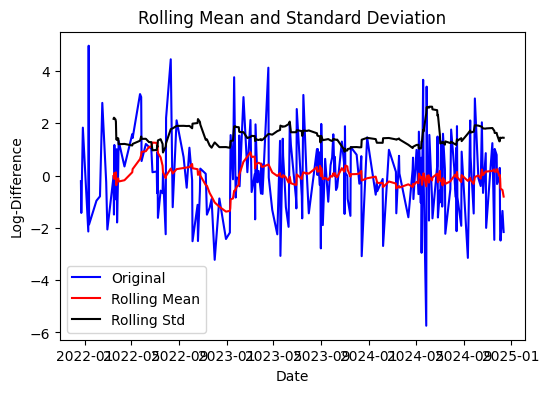

Test Statistic                -1.736206e+01
p-value                        5.196850e-30
Number of Lags Used            0.000000e+00
Number of Observations Used    2.120000e+02
Critical Value (1%)           -3.461578e+00
Critical Value (5%)           -2.875272e+00
Critical Value (10%)          -2.574089e+00
dtype: float64


In [376]:
#retest the stationarity of the closing price
def test_stationarity(timeseries):
    
    # Transformation to make the data stationary
    timeseries_log = np.log(timeseries)
    timeseries_log_diff = timeseries_log.diff().dropna()

    # Remove infinite values and NaNs
    timeseries_log_diff.replace([np.inf, -np.inf], np.nan, inplace=True)
    timeseries_log_diff.dropna(inplace=True)

    # Determing rolling statistics
    rolmean = timeseries_log_diff.rolling(window=12).mean()
    rolstd = timeseries_log_diff.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(6, 4))
    plt.plot(timeseries_log_diff, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.xlabel('Date')
    plt.ylabel('Log-Difference')
    plt.show()

    # Perform ADF test
    adft = adfuller(timeseries_log_diff, autolag='AIC')

    # Output the ADF test results
    output = pd.Series(adft[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in adft[4].items():
        output[f'Critical Value ({key})'] = value
    print(output)


test_stationarity(df['close_log_diff'])

**En conclusion**, les résultats indiquent que la série temporelle différenciée en logarithme est stationnaire. Cela signifie que les propriétés statistiques de la série (telles que la moyenne et la variance) ne changent pas au fil du temps, ce qui est une condition préalable importante pour nos modèles de prévision de séries temporelles.

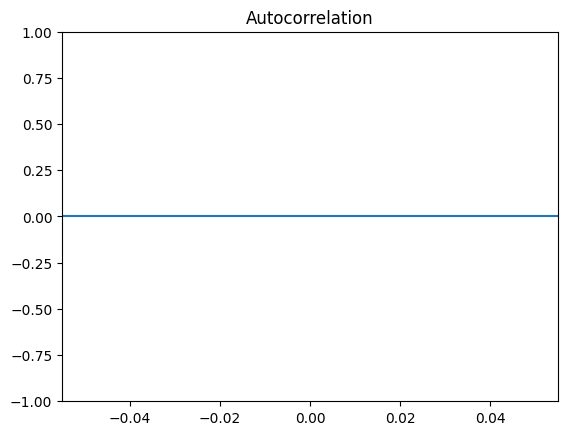

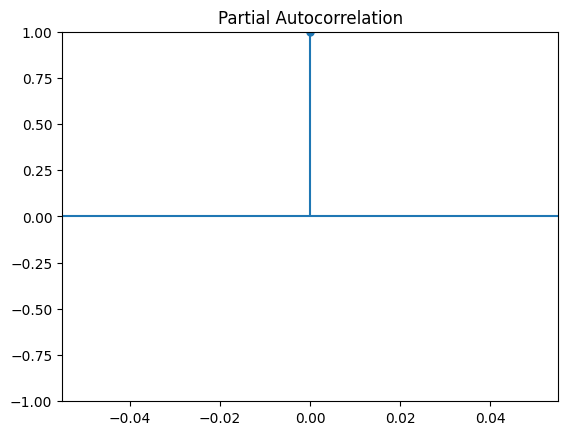

In [377]:
#acf and pacf of the transformed closing price
plot_acf(df['close_log_diff'], lags=20)
plt.show()

plot_pacf(df['close_log_diff'], lags=20)
plt.show()


<div style="text-align: center;">
    <h3>BUILD MODEL ARIMA</h3>
</div>



Commençant avec un modèle ARIMA(p, d, q) avec 
d=1 (différenciation pour stationnarité), p=1 ou 2
 (basé sur PACF), et
q=0 (faible influence MA suggérée).


In [378]:
#replace the infinite values with NaNs
df['close_log_diff'].replace([np.inf, -np.inf], np.nan, inplace=True)

#drop the NaNs
df['close_log_diff'].dropna(inplace=True)

In [379]:
#split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_log_diff, test_log_diff = df['close_log_diff'][:train_size], df['close_log_diff'][train_size:]

train_log_diff.head()

Date
2021-12-14         NaN
2021-12-15    0.028110
2021-12-16   -0.040055
2021-12-17   -0.006523
2021-12-20   -0.008155
Name: close_log_diff, dtype: float64

In [380]:
#drop the NaNs
train_log_diff.dropna(inplace=True)

In [381]:
#check for missing values
train_log_diff.isna().sum()

0

C:\Users\darck\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\darck\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\darck\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\darck\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
 

                               SARIMAX Results                                
Dep. Variable:         close_log_diff   No. Observations:                  603
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1567.717
Date:                Sat, 14 Dec 2024   AIC                          -3129.433
Time:                        16:11:14   BIC                          -3116.233
Sample:                             0   HQIC                         -3124.295
                                - 603                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0085      0.036      0.235      0.814      -0.062       0.079
ma.L1         -0.9999      0.648     -1.542      0.123      -2.271       0.271
sigma2         0.0003      0.000      1.544      0.1

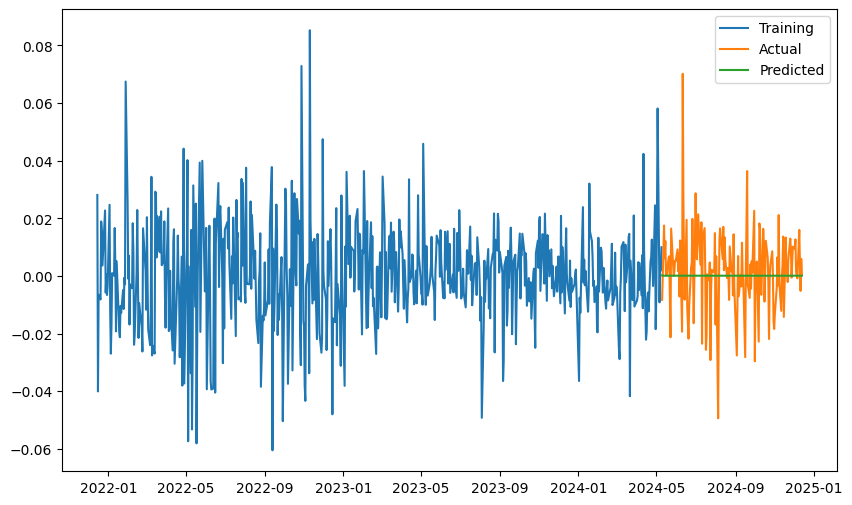

In [382]:
#build the ARIMA model with the training data and make predictions on the testing data and plot the results

# Ensure the data is in the correct format
train_log_diff = train_log_diff.dropna()

# Build the ARIMA model
model = ARIMA(train_log_diff, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# Make predictions
predictions1 = model_fit.forecast(steps=len(test_log_diff))

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(train_log_diff ,label='Training')
plt.plot(test_log_diff, label='Actual')
plt.plot(test_log_diff.index, predictions1, label='Predicted')
plt.legend()
plt.show()




In [383]:
mse = mean_squared_error(test_log_diff, predictions1)
mse

#calculate the accuracy of the model
accuracy = 100 - (mse * 100)
print(f'Model Accuracy: {accuracy}%', '\n', f'mean_squared_error : {mse}')

Model Accuracy: 99.98017605931706% 
 mean_squared_error : 0.0001982394068293454


<div style="text-align: center;">
    <h3>BUILD MODEL SARIMA</h3>
</div>

C:\Users\darck\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\darck\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\darck\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\darck\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning

                                     SARIMAX Results                                      
Dep. Variable:                     close_log_diff   No. Observations:                  603
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                1506.908
Date:                            Sat, 14 Dec 2024   AIC                          -3003.817
Time:                                    16:11:15   BIC                          -2981.916
Sample:                                         0   HQIC                         -2995.285
                                            - 603                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0051      0.037      0.138      0.890      -0.067       0.078
ma.L1         -0.9973      0.035   

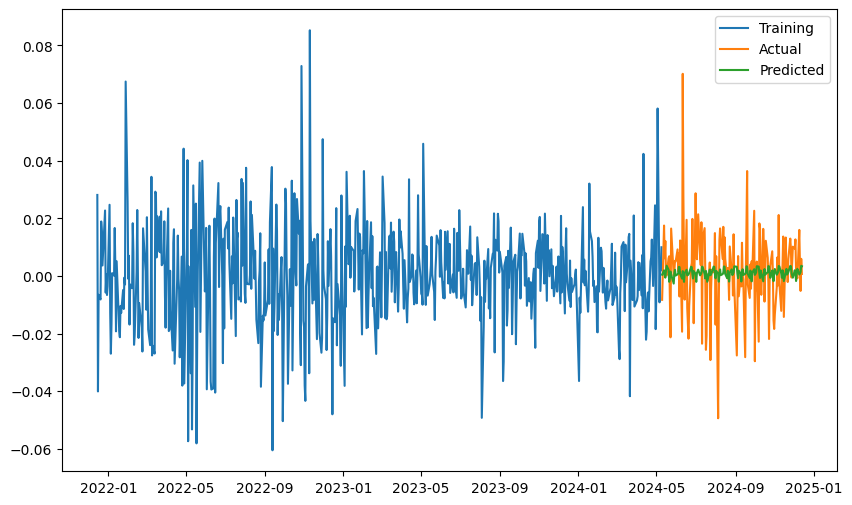

In [384]:
# Build the SARIMA model with the training data and make predictions on the testing data and plot the results

# Build the SARIMA model
model = SARIMAX(train_log_diff, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()
print(model_fit.summary())

# Make predictions
predictions2 = model_fit.forecast(steps=len(test_log_diff))


# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(train_log_diff ,label='Training')
plt.plot(test_log_diff, label='Actual')
plt.plot(test_log_diff.index, predictions2, label='Predicted')
plt.legend()
plt.show()



In [385]:
#calculate the mean squared error of the predictions
mse = mean_squared_error(test_log_diff, predictions2)


#calculate the accuracy of the model
accuracy = 100 - (mse * 100)    
print(f"accuracy = " ,accuracy,"error = "  , mse)

accuracy =  99.98053953763929 error =  0.00019460462360715368


<div style="text-align: center;">
    <h3>BUILD MODEL LSTM</h3>
</div>

In [386]:
#display the data
df.head()   

,Close,MA20,MA50,Close_scaled,close_log,close_log_diff
Date,,,,,,
2021-12-14,174.330002,NaN,NaN,0.400536,5.160950,NaN
2021-12-15,179.300003,NaN,NaN,0.440907,5.189060,0.028110
2021-12-16,172.259995,NaN,NaN,0.383722,5.149005,-0.040055
2021-12-17,171.139999,NaN,NaN,0.374624,5.142482,-0.006523
2021-12-20,169.750000,NaN,NaN,0.363334,5.134327,-0.008155


In [387]:
# Create a new dataframe with only the 'Close column 
data1 = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data1.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

718

In [388]:
#reshape the Close_scaled column to a 2D array
scaled_data = df['Close_scaled'].values.reshape(-1,1)

In [390]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.40053612, 0.44090653, 0.38372183, 0.37462432, 0.36333361,
       0.38965158, 0.41117699, 0.41637559, 0.44927302, 0.44082522,
       0.44155637, 0.43197138, 0.42685409, 0.46291929, 0.44415561,
       0.40532855, 0.38160994, 0.38299081, 0.3831533 , 0.40662823,
       0.41028348, 0.3831533 , 0.39030142, 0.36373977, 0.33474126,
       0.32077   , 0.30371216, 0.29729507, 0.28234912, 0.28161809,
       0.27780036, 0.36804486, 0.40419136, 0.4028105 , 0.41280153,
       0.38892043, 0.38477784, 0.37884822, 0.40459753, 0.41637559,
       0.38258464, 0.35431728, 0.3562668 , 0.38802691, 0.38607752,
       0.3562668 , 0.34343273, 0.31922677, 0.2847048 , 0.30639271,
       0.32353186, 0.32572493, 0.31012913, 0.3374218 , 0.33474126,
       0.30988546, 0.2784502 , 0.26334176, 0.30809843, 0.27211441])]
[0.24132886927125385]

[array([0.40053612, 0.44090653, 0.38372183, 0.37462432, 0.36333361,
       0.38965158, 0.41117699, 0.41637559, 0.44927302, 0.44082522,
       0.44155637, 0.43197138, 0.42

In [409]:
from keras.layers import Dropout

# Build the improved LSTM model
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100


C:\Users\darck\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.0579
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0062
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0051
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0043
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0048
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0047
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0033
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0037
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0034
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0038
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0045
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0025
Epoch 13/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0030
Epoch 14/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0027
Epoch 15/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0025
E

In [410]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                  │ (None, 60, 256)        │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 60, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,542,065 (5.88 MB)

 Trainable params: 514,021 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,028,044 (3.92 MB)

In [411]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, 0]  # Select only the 'Close' column
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions3 = model.predict(x_test)
predictions3 = scaler.inverse_transform(predictions3)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions3 - y_test.reshape(-1, 1)) ** 2)))
rmse

#calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, predictions3)
mse

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 357ms/step


9.220745615642267

C:\Users\darck\AppData\Local\Temp\ipykernel_26764\2554651337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions3


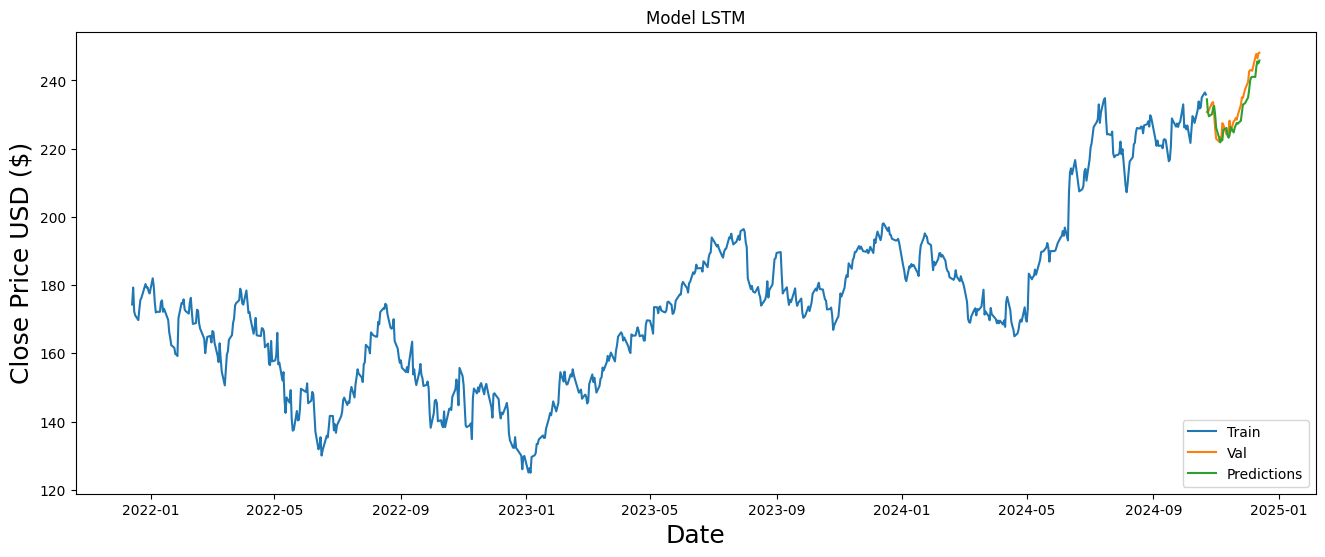

In [412]:
# Plot the data
train = data1[:training_data_len]
valid = data1[training_data_len:]
valid['Predictions'] = predictions3

# Visualize the data 
plt.figure(figsize=(16,6))
plt.title('Model LSTM')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the accurate

In [413]:
# Calculer les métriques d'évaluation pour LSTM
mae = mean_absolute_error(y_test, predictions3)
print(f'Mean Absolute Error: {mae}')

mse = mean_squared_error(y_test, predictions3)
print(f'Mean Squared Error: {mse}')



Mean Absolute Error: 2.6506764179951436
Mean Squared Error: 9.220745615642267


In [414]:
valid.head()

,Close,Predictions
Date,,
2024-10-23,230.759995,234.465393
2024-10-24,230.570007,230.687195
2024-10-25,231.410004,229.500397
2024-10-28,233.399994,230.136993
2024-10-29,233.669998,231.900864
